In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interactive, interact


%matplotlib notebook

In [3]:
all_currs = pd.read_csv('./data/mod_simulations-fig2/all_currs.csv')
all_iv = pd.read_csv('./data/mod_simulations-fig2/all_iv.csv')
all_params = pd.read_csv('./data/mod_simulations-fig2/all_params.csv')
baseline_curr = pd.read_csv('./data/mod_simulations-fig2/baseline_curr.csv')
all_v = list(range(-90, 50, 5))

In [4]:
baseline_dat = np.loadtxt('./data/mod_simulations-fig2/baseline.csv')
#[print(f'{idx}: {name}') for idx, name in enumerate(all_iv.columns)]

#len(all_iv.values[:, 1])
len(baseline_curr)
#len(times)

585599

<IPython.core.display.Javascript object>


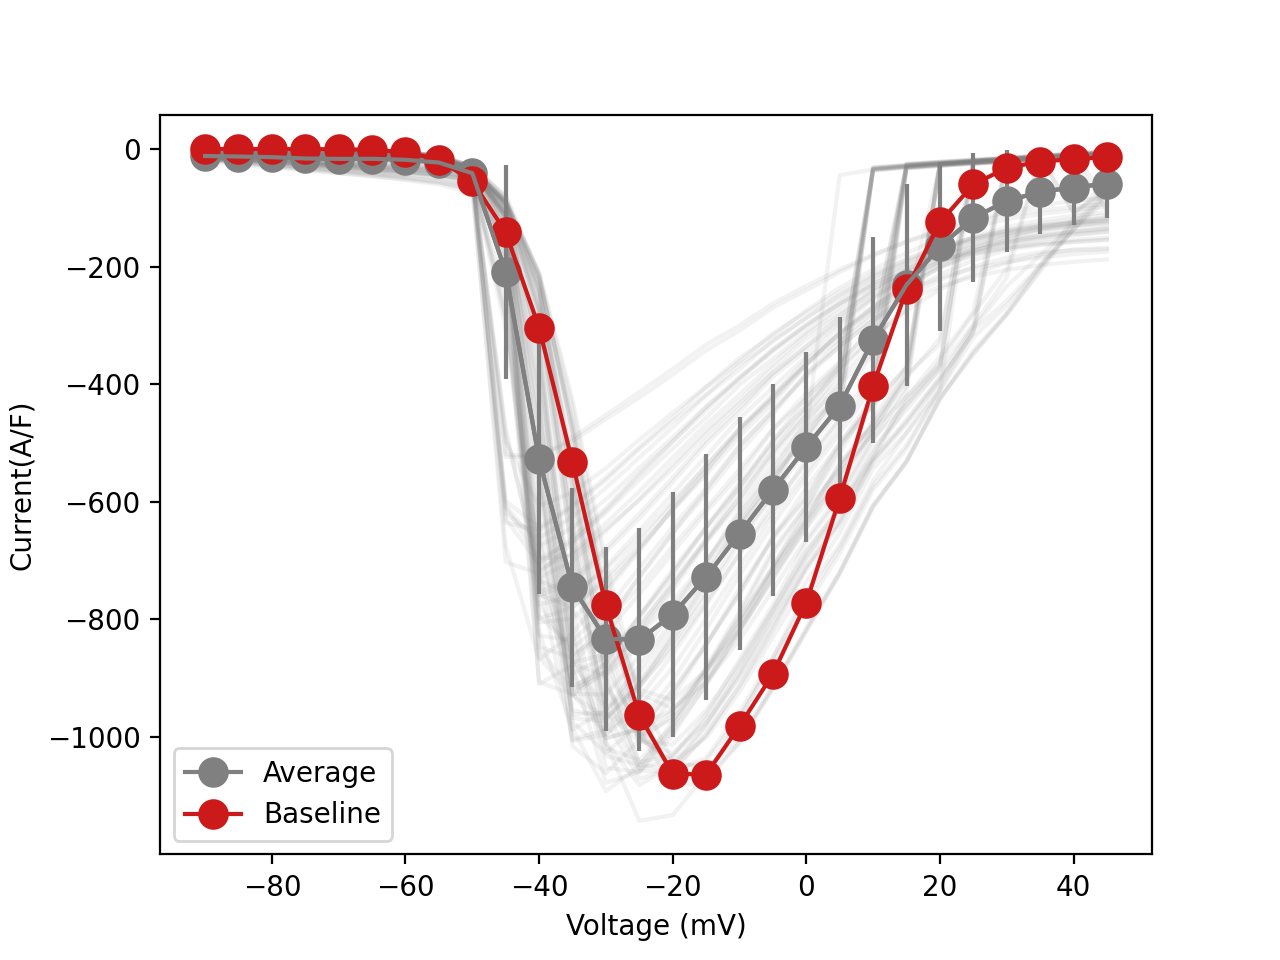

interactive(children=(IntSlider(value=10, description='cm', max=19, min=5), FloatSlider(value=2.0, description…

<function __main__.update(cm=10, ra=2.0)>

In [17]:
#for col in all_iv.columns:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(0, len(all_iv.values[0, :])):
    ax.plot(all_v, all_iv.values[:, i], 'grey', alpha=.1)

line1 = ax.plot(all_v, all_iv.mean(axis=1).values, 'grey', marker='o', markersize=10, label='Average')
line2 = ax.plot(all_v, baseline_dat, c=(.8, .1, .1), marker='o', markersize=10, label='Baseline')
ebars = ax.errorbar(all_v, all_iv.mean(axis=1).values, yerr=all_iv.std(axis=1).values, c='grey')

#line3, = ax.plot(all_v, all_iv.values[:,0], 'k', marker='o', label='Individual')

ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('Current(A/F)')
plt.legend()


def update(cm=10, ra=2.0):
    start_idx = (cm - 5) * 5
    ra_idx = (ra - 2) / 2.5
    idx = int(start_idx + ra_idx)
    print(idx)
    print(all_iv.columns[idx])
    line3.set_ydata(all_iv.values[:, idx])
    fig.canvas.draw_idle()

interact(update, cm=(5, 19, 1), ra=(2.0, 12.0, 2.5))

In [1]:
line3, = ax.plot(all_v, all_iv.values[:,4], 'k', marker='o', label='Individual')
line3, = ax.plot(all_v, all_iv.values[:,5], 'k', marker='o', label='Individual')
line3, = ax.plot(all_v, all_iv.values[:,20], 'k', marker='o', label='Individual')
line3, = ax.plot(all_v, all_iv.values[:,25], 'k', marker='o', label='Individual')
line3, = ax.plot(all_v, all_iv.values[:,8], 'k', marker='o', label='Individual')

NameError: name 'ax' is not defined

<IPython.core.display.Javascript object>


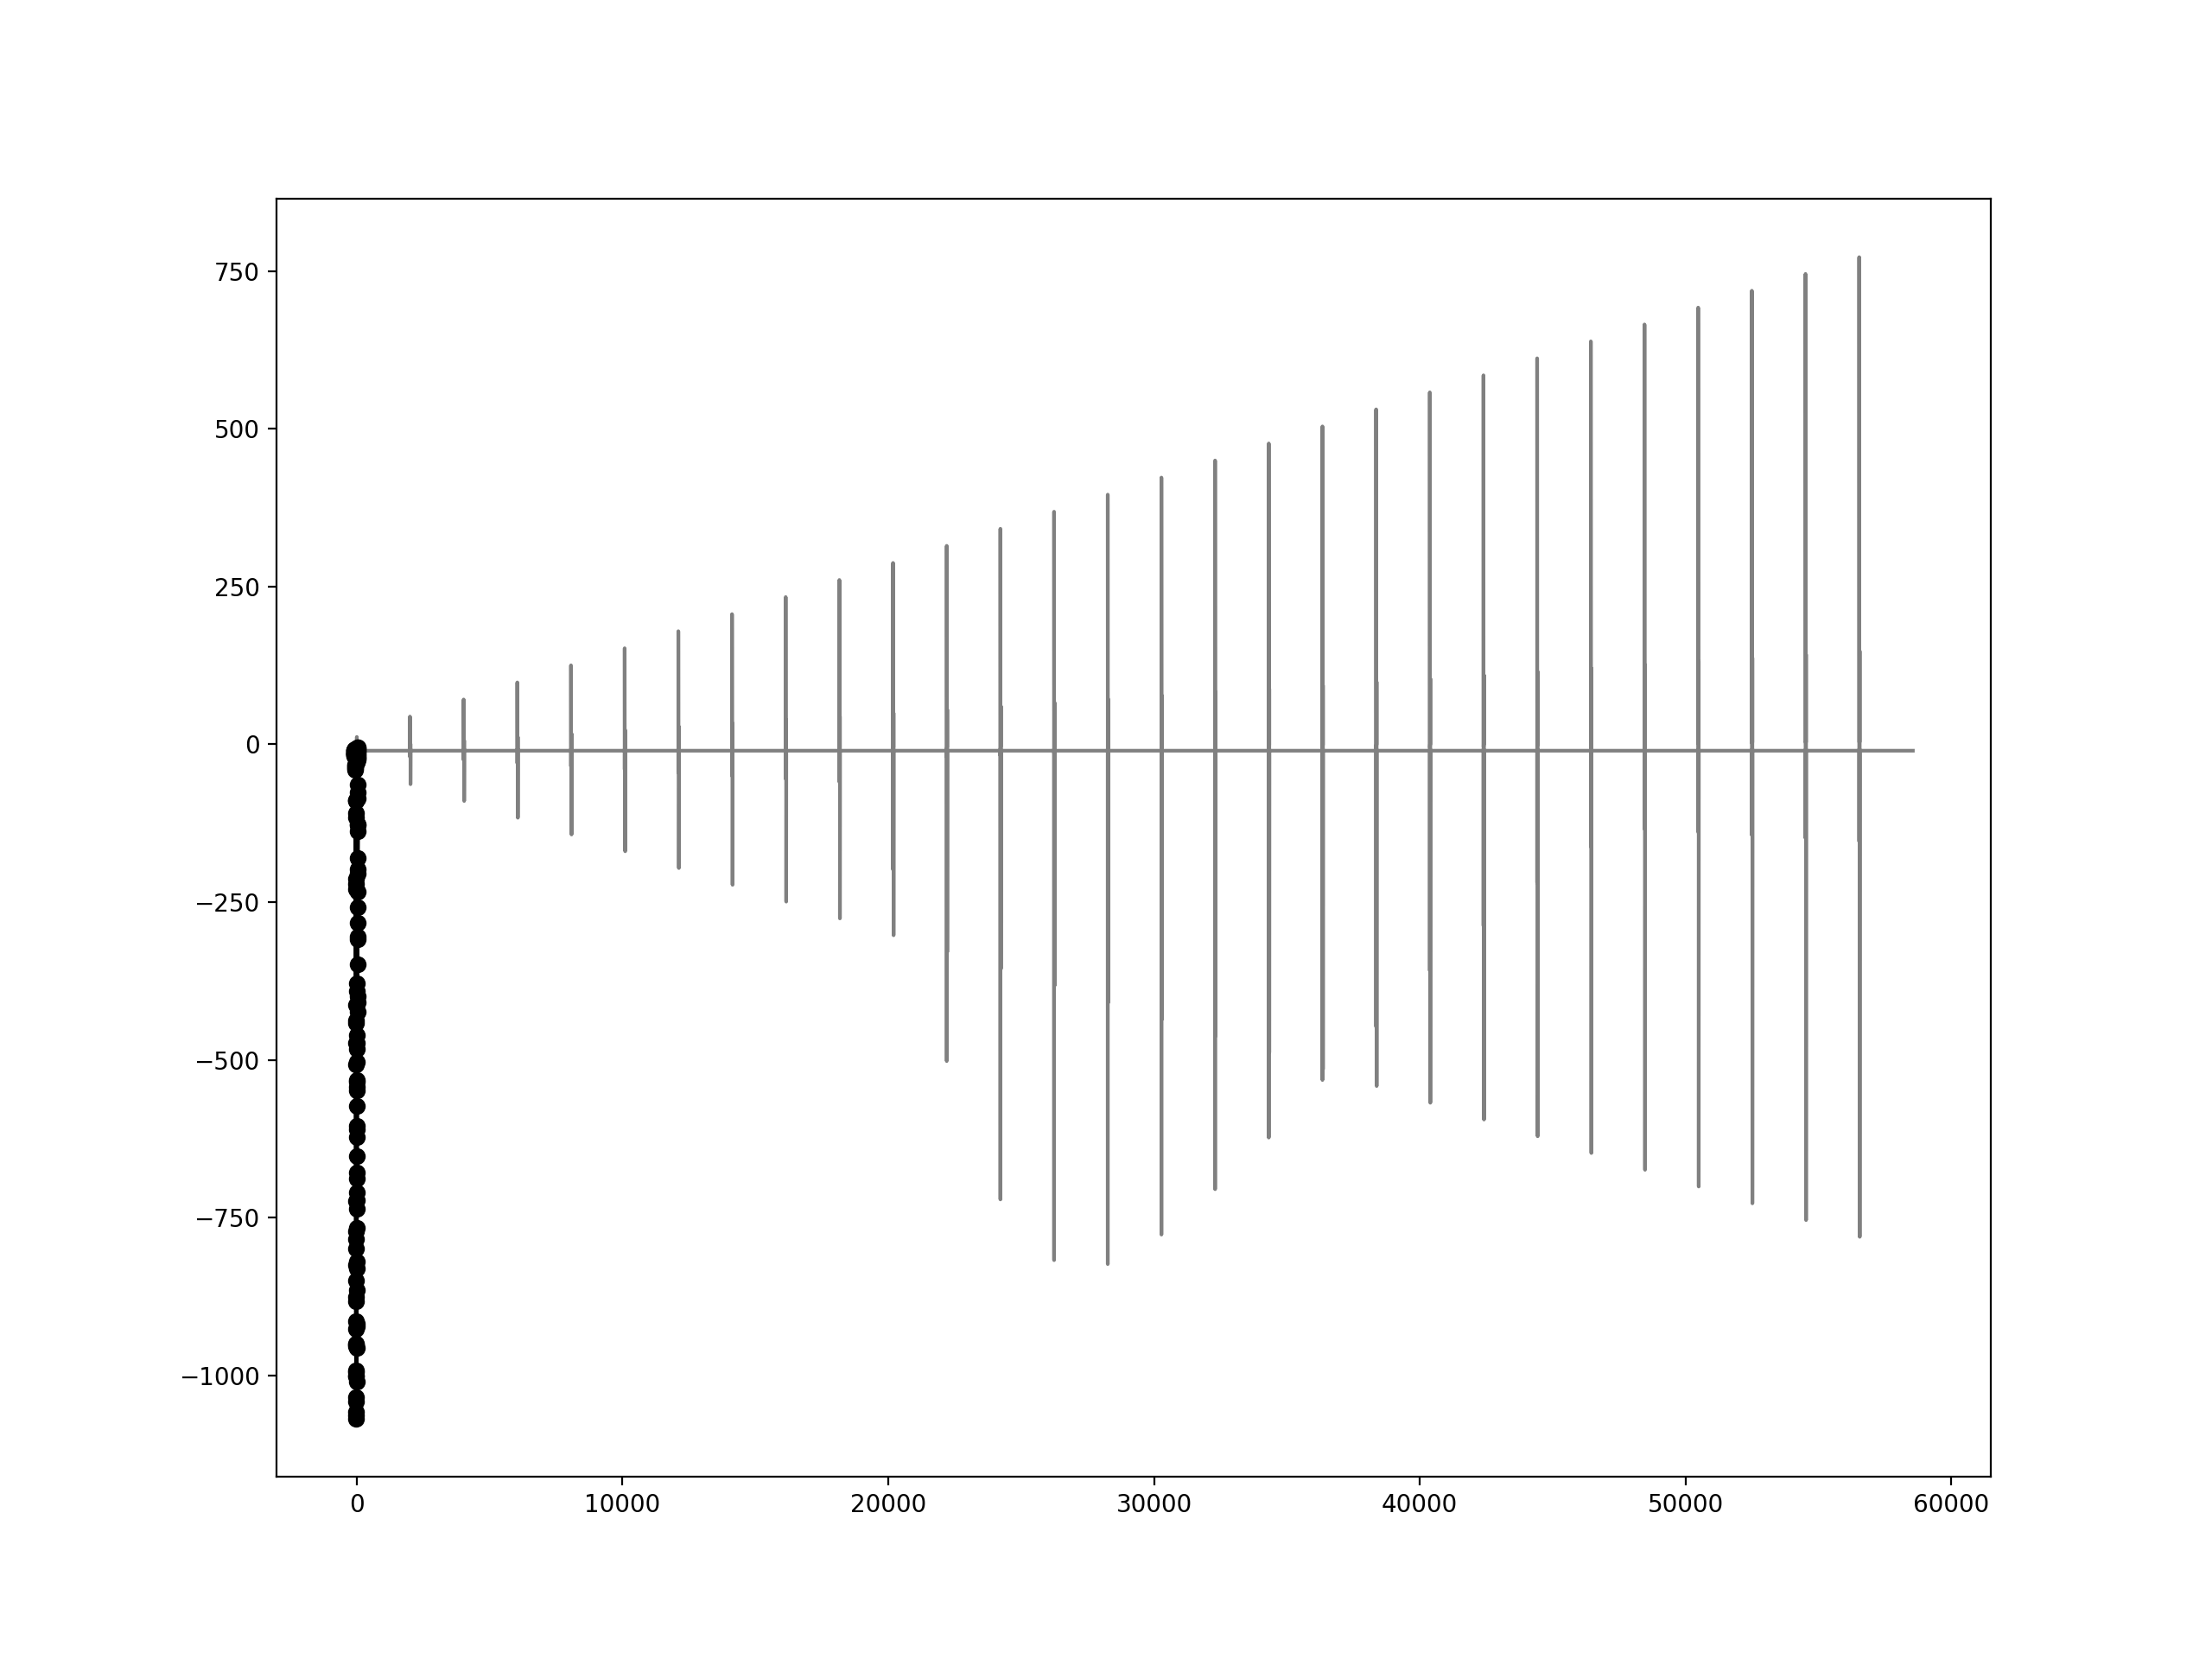

ValueError: x and y must have same first dimension, but have shapes (1464000,) and (585599, 1)

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

times = np.linspace(0, 1464000/25, 1464000)
line1 = ax.plot(times, all_currs.mean(axis=1).values, 'grey', markersize=12, label='Average')
times = np.linspace(0, 585599/10000, 1464000)
line2 = ax.plot(times, baseline_curr, 'blue', label='Baseline')
print(len(all_currs.values[:,0]))

line3, = ax.plot(times, all_currs.values[:,0], 'k', label='Individual')

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current(A/F)')
ax.set_xlim(28255, 28270)
ax.set_ylim(-1500, 200)
plt.legend()

def update(cm=10, ra=2.0):
    start_idx = (cm - 5) * 5
    ra_idx = (ra - 2) / 2.5
    idx = int(start_idx + ra_idx)
    print(idx)
    print(all_iv.columns[idx])
    line3.set_ydata(all_currs.values[:, idx])
    fig.canvas.draw_idle()

interact(update, cm=(5, 19, 1), ra=(2.0, 12.0, 2.5))